In [33]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
Titanic_train = pd.read_csv('train.csv')

In [35]:
Titanic_test = pd.read_csv('test.csv')

In [36]:
Titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
Titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
#check the shape of train and test data
print(Titanic_test.shape)
print(Titanic_train.shape)

(418, 11)
(891, 12)


###### Data Dictionary Variable Definition Key

survival Survival 0 = No, 1 = Yes

pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex Sex

Age Age in years

sibsp # of siblings / spouses aboard the Titanic

parch # of parents / children aboard the Titanic

ticket Ticket number

fare Passenger fare

cabin Cabin number

embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [39]:
Titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
Titanic_train_NPID= Titanic_train.drop('PassengerId', axis = 1) #drop PassengerId  as it is not important for test and train data
Titanic_test_NPID = Titanic_test.drop('PassengerId', axis = 1)                 

In [41]:
Titanic_train_NPID.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
Titanic_test_NPID.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
#Check for missing data and find a way of fixing them
Titanic_train_NPID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [44]:
Titanic_train_NPID.Age.bfill(axis=None, inplace = True)
print(Titanic_train_NPID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None


In [45]:
Titanic_test_NPID.Age.ffill(axis=None, inplace = True)
print(Titanic_test_NPID.info())
Titanic_test_NPID.Fare.bfill(axis=None, inplace = True)
print(Titanic_test_NPID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB
None


In [46]:
Titanic_train_NPID.Embarked.mode()

0    S
dtype: object

In [47]:
Titanic_train_NPID.Embarked.fillna(value = 'S', inplace = True)
Titanic_train_NPID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [48]:
Titanic_train_NPID.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
Titanic_test_NPID.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
Titanic_train_NPID_ = Titanic_train_NPID.drop('Cabin', axis = 1) #drop Cabin  as it is not important for test and train data
Titanic_test_NPID_ = Titanic_test_NPID.drop('Cabin', axis = 1)

In [51]:
Titanic_train_NPID_.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [52]:
Titanic_test_NPID_.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [53]:
import seaborn as sns

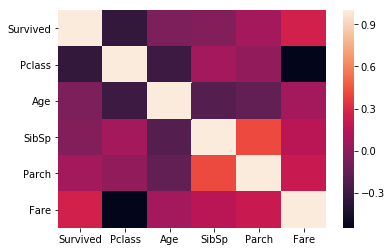

In [54]:
sns.heatmap(Titanic_train_NPID_.corr())

In [55]:
Titanic_test_NPID_.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.391077,0.001087,0.018721,-0.577376
Age,-0.391077,1.000000,-0.086738,-0.010557,0.294445
SibSp,0.001087,-0.086738,1.000000,0.306895,0.171954
Parch,0.018721,-0.010557,0.306895,1.000000,0.230355
Fare,-0.577376,0.294445,0.171954,0.230355,1.000000


In [56]:
Titanic_train_NPID_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [59]:
Titanic_train_NPID_['Sex'] = Titanic_train_NPID_['Sex'].apply(lambda x: 0 if x == 'female' else 1)
Titanic_test_NPID_['Sex'] = Titanic_test_NPID_['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [66]:
Titanic_train_NPID_.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [69]:
Titanic_d_train = Titanic_train_NPID_.replace({'S':0, 'C': 1, 'Q':2})
Titanic_d_test = Titanic_test_NPID_.replace({'S':0, 'C': 1, 'Q':2})

In [70]:
Titanic_d_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [71]:
Titanic_d_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2
3,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0


In [73]:
Titanic_d_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [72]:
Titanic_d_train.drop(['Name', 'Ticket'], axis = 1, inplace = True)
Titanic_d_test.drop(['Name', 'Ticket'], axis = 1, inplace  = True)

In [78]:
from sklearn.model_selection import train_test_split

predictors = Titanic_d_train.drop('Survived', axis = 1)
target = Titanic_d_train['Survived']

In [80]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size =0.20,
                                                    random_state = 42)

In [81]:
predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
y_pred = logReg.predict(x_test)

In [84]:
print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [88]:
acccuracy = round(accuracy_score(y_pred, y_test)*100, 1)
print(acccuracy)

78.2


In [89]:
Cm = confusion_matrix(y_pred, y_test)
Cm

array([[89, 23],
       [16, 51]], dtype=int64)

In [90]:
print (classification_report(y_pred, y_val))

             precision    recall  f1-score   support

          0       0.66      0.65      0.66       112
          1       0.43      0.45      0.44        67

avg / total       0.58      0.58      0.58       179



Decision Tree Model

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
y_pred = tree.predict(x_test)

In [94]:
acccuracy = round(accuracy_score(y_pred, y_test)*100, 1)
print(acccuracy)

79.3


In [95]:
Cm = confusion_matrix(y_pred, y_test)
Cm

array([[84, 16],
       [21, 58]], dtype=int64)

In [96]:
print (classification_report(y_pred, y_val))

             precision    recall  f1-score   support

          0       0.58      0.64      0.61       100
          1       0.48      0.42      0.45        79

avg / total       0.54      0.54      0.54       179



Random Forest 

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
forest = DecisionTreeClassifier()
forest.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
y_pred = forest.predict(x_test)

In [100]:
acccuracy = round(accuracy_score(y_pred, y_test)*100, 1)
print(acccuracy)

80.4


In [101]:
Cm = confusion_matrix(y_pred, y_test)
Cm

array([[85, 15],
       [20, 59]], dtype=int64)

In [102]:
print (classification_report(y_pred, y_val))

             precision    recall  f1-score   support

          0       0.57      0.63      0.60       100
          1       0.46      0.41      0.43        79

avg / total       0.52      0.53      0.53       179



In [ ]:
y_predict = logReg.predict(Titanic_dtest)
print(y_predict)

In [ ]:
submission = pd.DataFrame({'PassengerId':Titanic_test['PassengerId'], 'Survived': y_predict})


In [ ]:
filename = 'Titanic Prediction_Dev 03.csv'
submission.to_csv(filename,index = False)
print('saved file:' + filename)